**Importing Modules(Libraries)**

In [49]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.base import clone

from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, precision_recall_curve

**Importing the MNIST Dataset** <br>
The dataset is also cached so it can be easily accessed the next time it is needed.


In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In the dataset we have:
* A DESCR Key describing the data
* A data key containing an array with one row per instance and one column per feature
* A target key containing an array with the labels

**Checking out the arrays**

In [4]:
X, y = mnist["data"], mnist['target']
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In total, the data has 70,000 images and 784 features.<br>
This is because each feature simply represents one pixel's intensity and each picture in the dataset is a 28 x 28 picture. <br>
Each feature has a value ranging from 0 to 255, this is representative of the color intensity from white(0) to black(255).

In [7]:
some_digit = np.array(X.iloc[8])

# Reshaping the pictures grid into their original shape
# to make up the picture

some_digit_image = some_digit.reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

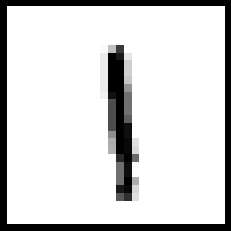

In [8]:
plt.imshow(
    some_digit_image, cmap=mpl.cm.binary,
    interpolation="nearest"
)
plt.axis("off")

In [9]:
y[8]

'1'

In [10]:
# Changing the values in y seeing as they are all objects
y = y.astype(np.uint8)

In [11]:
y[8]

1

**Note:** Splitting the data into training and test sets, a common way to do this is using the sklearn train_test_split function, that however is not neccesary in this case since the data has been divided into training and test sets already.
<br>

<br>
Here we select the first 60,000(80%) of both X and y as the training datasets and the remaining 10,000(20%) as the test set

In [23]:
X_train, X_test, y_train, y_test = X[:60000].values, X[60000:].values, y[:60000], y[60000:]

### **Measures of Accuracy**

**Implementing Cross Validation**

In [47]:
sgd_clf = SGDClassifier(random_state=0)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=0)

In [29]:
skfolds = StratifiedKFold(n_splits=9, random_state=0, shuffle=True)
#Always remember to set shuffle to True when using random_state

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    X_test_folds = X_train[test_index]
    y_train_fold = y_train[train_index]
    y_test_fold = y_train[test_index]

    clone_clf.fit(X_train_folds, y_train_fold)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    

0.84040797960102
0.8642567871606419
0.8813559322033898
0.8656067196640168
0.8504574771261437
0.8771561421928904
0.873987398739874
0.8852385238523852
0.8831383138313832


Above, StratifiedKFold is used to split the data into folds that contain a representative ratio of each class. On every iteration of the loop, the code clones the classifier (sgd_clf) and trains the clone on the current clone.
It does this for all the folds while finally checking the ratio of correct predictions. <br>

<br>


In [30]:
# Using sklearn's cross_val_score method instead
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8485, 0.8676, 0.8621])

**Confusion Matrix**

!["Confusion Matrix"](https://miro.medium.com/max/1400/1*PULzWEven_XAZjiMNizDCg.png)

In [31]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [33]:
confusion_matrix(y_train, y_train_pred)

array([[5704,    1,   18,   63,   11,   18,   48,    5,   52,    3],
       [   2, 6271,   72,  209,   10,   54,   20,   12,   80,   12],
       [  87,   35, 4924,  370,   90,   22,  122,   62,  236,   10],
       [  55,    9,  140, 5642,   13,   97,   30,   41,   55,   49],
       [  19,   16,   33,   60, 5349,   22,   62,   25,   65,  191],
       [ 134,   16,   49,  671,  117, 3948,  176,   29,  186,   95],
       [  63,   12,   54,    9,   41,   66, 5632,    1,   37,    3],
       [  33,   13,   87,  215,  121,   20,    6, 5271,   37,  462],
       [ 105,   69,  127,  828,   91,  233,   70,   18, 4183,  127],
       [  48,   19,   26,  370,  451,   75,    6,  248,   66, 4640]],
      dtype=int64)

Although the confusion matrix provides a lot of information a more concise matrix is sometimes needed. Some of these metrics are:
* Precision
* Recall/Sensitivity (Usually used with precision)

**Precision**

!["Precision"](https://miro.medium.com/max/948/1*HGd3_eAJ3-PlDQvn-xDRdg.png)

In [38]:
precision_score(y_train, y_train_pred, average='micro')

0.8594

In [40]:
recall_score(y_train, y_train_pred, average='micro')

0.8594

In [44]:
f1_score(y_train, y_train_pred, average="micro")

0.8594000000000002

In [52]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")


In [ ]:
# precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

ValueError: multiclass format is not supported

In [ ]:
# def plot_PR_curve(precisions, recalls, thresholds):
#     """
#         A Function to plot the precision recall curve of a classifier
#     """
#     plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
#     plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")

#     plt.show()